In [98]:
#Data.csv

**Step 1: Importing the libraries**

In [99]:
import pandas as pd

In [100]:
import matplotlib.pyplot as plt

**Step 2: Importing dataset**

In [101]:
df=pd.read_csv('Data.csv')
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


**Step 3: Handling the missing data**

In [102]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

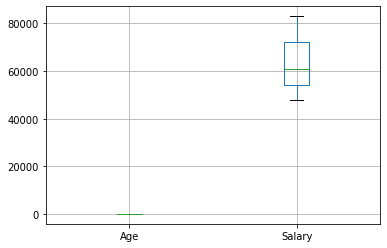

In [103]:
df.boxplot()

In [104]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Salary'].fillna(df['Salary'].mean(),inplace=True)

In [105]:
df.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

**Step 4: Encoding categorical data**

In [106]:
df['Purchased'].unique()

array(['No', 'Yes'], dtype=object)

In [107]:
df['Purchased']=df['Purchased'].map({'Yes':1,'No':0})
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,0
1,Spain,27.0,48000.000000,1
2,Germany,30.0,54000.000000,0
3,Spain,38.0,61000.000000,0
4,Germany,40.0,63777.777778,1


**Step 5: Creating a dummy variable**

In [108]:
df=pd.get_dummies(df)
df.head()

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,72000.000000,0,1,0,0
1,27.0,48000.000000,1,0,0,1
2,30.0,54000.000000,0,0,1,0
3,38.0,61000.000000,0,0,0,1
4,40.0,63777.777778,1,0,1,0


**Step 6: Splitting the datasets into training sets and Test sets**

In [110]:
y=df['Purchased'].values
df.drop(columns=['Purchased'],inplace=True)
X=df.values

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

**Step 7: Feature Scaling**

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)